In [3]:
import  PIL, cv2, os, warnings, processor.visualization as visualization, utils, model, tqdm
import  processor
import  pandas              as      pd
import  numpy               as      np
import  matplotlib.pyplot   as      plt
from    PIL                 import  Image
from    matplotlib.pyplot   import  plot,text, cla, rcParams, text
from    scipy.optimize      import  curve_fit
from    scipy               import  ndimage
from    processor.tools               import  drop_check
from    scipy.signal        import  savgol_filter

warnings.filterwarnings("ignore", category=RuntimeWarning)

ModuleNotFoundError: No module named 'processor'

In [ ]:
import SFOF4S
import SFOF4S.model
import SFOF4S.processor
import SFOF4S.utils


framework = SFOF4S.model.initiation("torch")

# set variables
ad                          = r"PFOTS sample with a defect"
fps                         = 1000
cm_on_pixel_ratio           = 0.0039062
num_px_ratio                = (0.0039062)/cm_on_pixel_ratio
error_handling_kernel_size  = (5,5)
SFOF4S.utils.make_folders(ad)

dataframe= SFOF4S.processor.main_processor(ad,
                                    framework,
                                    num_px_ratio,
                                    cm_on_pixel_ratio,
                                    fps,
                                    error_handling_kernel_size)

# Batch analysis cell
Batch analysis involves processing multiple files in one go, and this cell helps by specifying the path to the main folder containing all the subfolders for analysis.

In [6]:
# set variables
folder_path = r"various_experiments" #Provide the path to the main folder containing multiple video subfolders.
fps=1000
cm_on_pixel_ratio= 0.0039062
error_handling_kernel_size=(5,5)

folders = [f.name for f in os.scandir(folder_path) if f.is_dir()]

for folder in folders:
    print("\r The folder under analysis:", folder,"--------------------------------------------------")
    ad = os.path.join(folder_path,folder)
    utils.make_folders(ad)
    df = processor.main_processor(  ad,
                                    framework,
                                    num_px_ratio,
                                    cm_on_pixel_ratio,
                                    fps,
                                    error_handling_kernel_size)

FileNotFoundError: [Errno 2] No such file or directory: 'various_experiments'

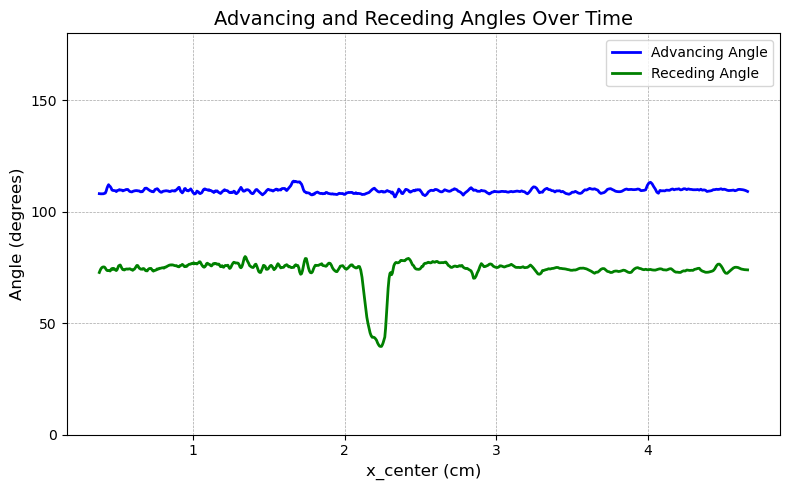

In [18]:
plt.figure(figsize=(8, 5))  # Adjust the size of the figure
plt.plot(df["x_center (cm)"], df["adv (degree)"], label="Advancing Angle", color="blue", linestyle="-", linewidth=2)
plt.plot(df["x_center (cm)"], df["rec (degree)"], label="Receding Angle", color="green", linestyle="-", linewidth=2)

# Adding titles and labels
plt.title("Advancing and Receding Angles Over Time", fontsize=14)
plt.xlabel("x_center (cm)", fontsize=12)
plt.ylabel("Angle (degrees)", fontsize=12)

# Customizing the grid
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

plt.ylim(0, 180)

# Adding a legend
plt.legend(fontsize=10, loc="best")

# Improving axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()  # Ensures everything fits well
plt.show()
